In [27]:
import cv2
import numpy as np
from math import sqrt 
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage.feature import canny
import matplotlib.pyplot as plt


In [28]:
from keras.models import Sequential, model_from_json,model_from_yaml
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# # Charger le modèle de classification binaire déjà entraîné
model = load_model('C:/Users/soltan/Desktop/project jupyter/HRD.h5')
# model = model_from_json(open('HRD.json').read())# 
# # model = model_from_yaml(open('HRD.yaml').read())#  
# model.load_weights('C:/Users/soltan/Desktop/project jupyter/HRD.h5')

# print(model.metrics_names)

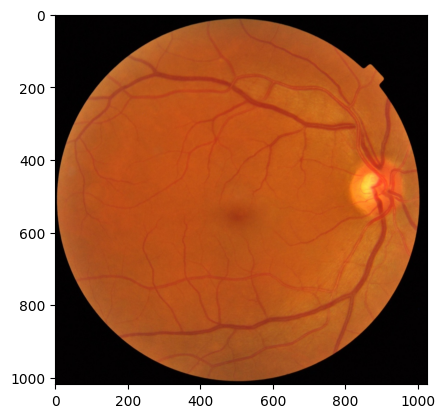

In [29]:
# Charger l'image à segmenter
img = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/try3.jpeg')
R,G,B = cv2.split(img)
# Convertir l'image de RGB à BGR
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

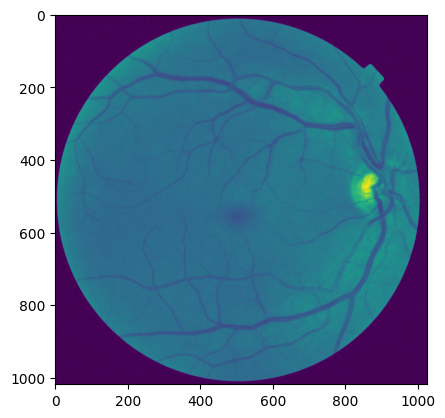

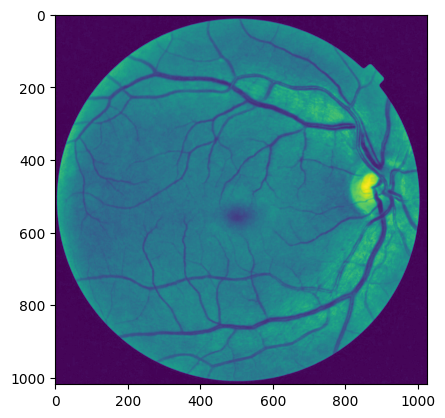

In [30]:
# Appliquer la technique CLAHE pour améliorer le contraste de l'image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img[:,:,1])
plt.imshow(G)
plt.show()
plt.imshow(img_clahe)
plt.show()

In [31]:
import cv2
import numpy as np

def frangi_filter(img, scale_range=(1, 10), scale_step=2, alpha=0.5, beta=0.5, gamma=15):
    # Initialize output image
    out = np.zeros_like(img)

    # Define scale range and step
    scale_min, scale_max = scale_range
    scales = range(scale_min, scale_max, scale_step)

    # Compute eigenvalues of Hessian matrix for each scale
    for scale in scales:
        sigma = np.sqrt(scale)
        hxx = cv2.Sobel(img, cv2.CV_32F, 2, 0, ksize=5, sigma=sigma)
        hyy = cv2.Sobel(img, cv2.CV_32F, 0, 2, ksize=5, sigma=sigma)
        hxy = cv2.Sobel(img, cv2.CV_32F, 1, 1, ksize=5, sigma=sigma)
        hessian = np.array([[hxx, hxy], [hxy, hyy]])
        eigvals, _ = np.linalg.eig(hessian)
        lambda1, lambda2 = eigvals

        # Compute vesselness measure
        r1 = np.abs(lambda1) / np.abs(lambda2)
        r2 = np.abs(lambda2) / np.abs(lambda1)
        s = np.sqrt(lambda1**2 + lambda2**2)
        frangi = np.exp(-r1**2 / (2 * alpha**2)) * (1 - np.exp(-s**2 / (2 * beta**2))) * (1 - np.exp(-r2**2 / (2 * gamma**2)))
        
        # Update output image
        out = np.maximum(out, frangi)

    return out

In [32]:
import cv2
import numpy as np

def hessian_filter(img, scale_range=(1, 10), scale_step=2, thresh=150):
    # Initialize output image
    out = np.zeros_like(img)

    # Define scale range and step
    scale_min, scale_max = scale_range
    scales = range(scale_min, scale_max, scale_step)

    # Compute Hessian matrix for each scale
    for scale in scales:
        sigma = np.sqrt(scale)
        hxx = cv2.Sobel(img, cv2.CV_32F, 2, 0, ksize=5, sigma=sigma)
        hyy = cv2.Sobel(img, cv2.CV_32F, 0, 2, ksize=5, sigma=sigma)
        hxy = cv2.Sobel(img, cv2.CV_32F, 1, 1, ksize=5, sigma=sigma)
        hessian = np.array([[hxx, hxy], [hxy, hyy]])

        # Compute response of Hessian filter
        trace = np.trace(hessian, axis1=0, axis2=1)
        det = np.linalg.det(hessian)
        response = (trace**2) / det

        # Apply thresholding to response
        response[response < thresh] = 0

        # Update output image
        out = np.maximum(out, response)

    return out

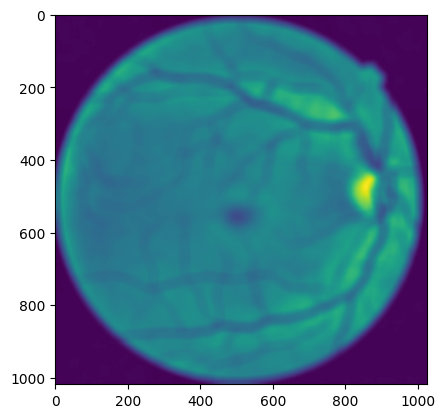

In [33]:
# average filtering
kernel = np.ones((31,31))/961
imgavg = cv2.filter2D(img_clahe,-1,kernel)
plt.imshow(imgavg)
plt.show()

[(856, 474)]
227


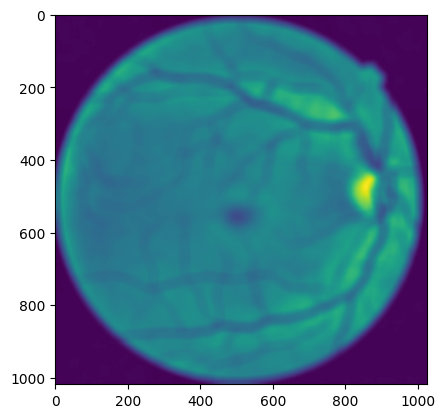

In [34]:
#intentité maximale 
hist = cv2.calcHist([img_clahe],[0],None,[256],[0,256])
maxVal = -1
maxLoc = [(0,0)]
for x in range(imgavg.shape[0]):
    for y in range(imgavg.shape[1]):
        #print(x,y)
        if imgavg[x][y] >= maxVal:
            maxVal = imgavg[x][y]
            maxLoc[0] = (y,x) 
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/img.jpg',imgavg)
print(maxLoc)
loc = len(maxLoc)
imgtemp = imgavg.copy()
print(imgavg[maxLoc[0][1]][maxLoc[0][0]])
cv2.circle(imgtemp,maxLoc[loc-1],5,(0),-1)
plt.imshow(imgavg)
plt.show()

In [35]:
# # Appliquer la méthode Canny pour détecter les contours
# edges = cv2.Canny(img_clahe, 1, 100)
# contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# # Trouver le contour du disque optique en sélectionnant le plus grand contour
# largest_contour = max(contours, key=cv2.contourArea)
# # Créer un masque pour la région d'intérêt (ROI) en utilisant le contour du disque optique
# mask = np.zeros_like(img_clahe)
# cv2.drawContours(mask, [largest_contour], 0, 255, -1)

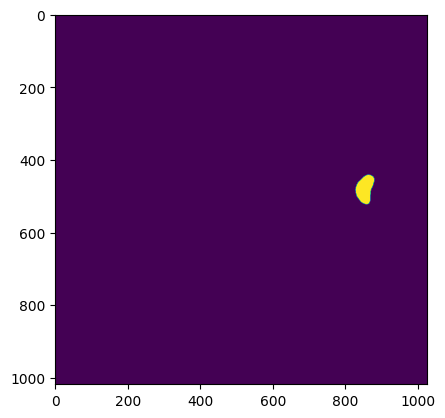

In [36]:
# thresholding
thresh, imgthresh = cv2.threshold(imgavg,180,255,cv2.THRESH_BINARY)
plt.imshow(imgthresh)
plt.show()

(array([[[860, 442]],

       [[859, 443]],

       [[858, 443]],

       [[857, 443]],

       [[856, 444]],

       [[855, 444]],

       [[854, 445]],

       [[853, 445]],

       [[852, 446]],

       [[851, 447]],

       [[850, 447]],

       [[849, 448]],

       [[848, 449]],

       [[847, 450]],

       [[846, 451]],

       [[845, 452]],

       [[844, 453]],

       [[843, 454]],

       [[842, 455]],

       [[841, 456]],

       [[840, 457]],

       [[839, 458]],

       [[838, 459]],

       [[837, 460]],

       [[836, 460]],

       [[836, 461]],

       [[835, 462]],

       [[834, 463]],

       [[833, 464]],

       [[833, 465]],

       [[832, 466]],

       [[832, 467]],

       [[831, 468]],

       [[831, 469]],

       [[830, 470]],

       [[830, 471]],

       [[830, 472]],

       [[829, 473]],

       [[829, 474]],

       [[829, 475]],

       [[828, 476]],

       [[828, 477]],

       [[828, 478]],

       [[828, 479]],

       [[828, 480]],

       [[

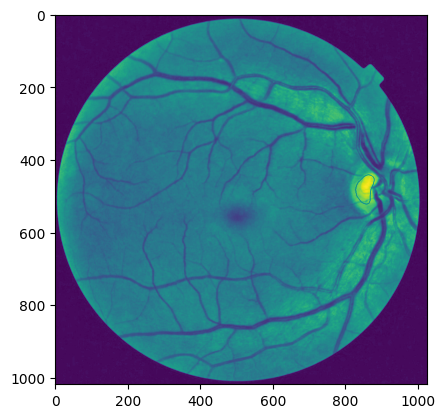

In [37]:
# contour
contours,hierarchy = cv2.findContours(imgthresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(contours)
cv2.drawContours(img_clahe, contours, contourIdx=-1, color=0, thickness=1)    
plt.imshow(img_clahe)
plt.show()

22


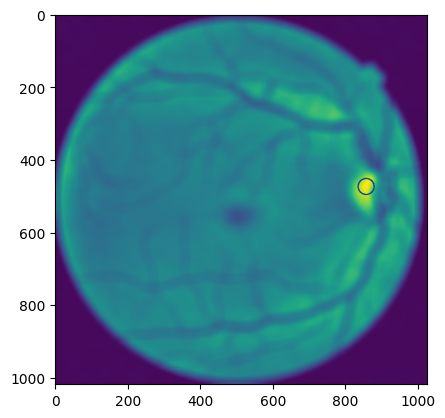

True

In [38]:
# radius
length = len(contours[0])
radius = 0
for i in range(length):
    radius = radius + sqrt((contours[0][i][0][0]-maxLoc[0][0])**2 + (contours[0][i][0][0]-maxLoc[0][0])**2)
radius = int(radius/length)
print(radius)
imgtemp2 = imgavg.copy()
cv2.circle(imgtemp2,maxLoc[loc-1],int(radius),(0),2)
plt.imshow(imgtemp2)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/Rditect.jpg',imgtemp2)

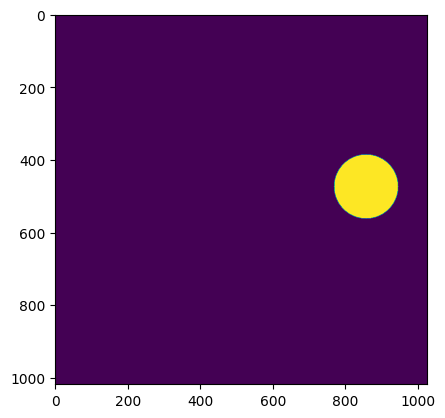

True

In [39]:
# ROI
ROIrad = radius*4
mask = np.zeros((imgthresh.shape[0],imgthresh.shape[1]), dtype=np.uint8)
cv2.circle(mask,maxLoc[loc-1],ROIrad,(255),-1)
plt.imshow(mask)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/ROIi.jpg',mask)

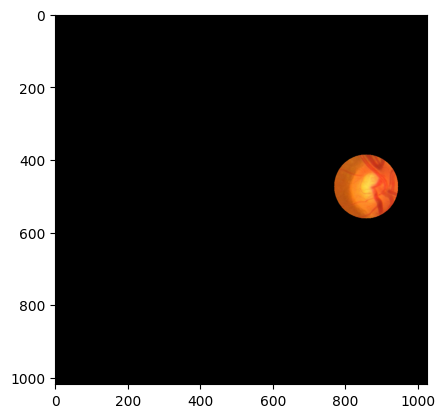

In [40]:
# Appliquer le masque sur l'image d'origine pour sélectionner la ROI
img_roi = cv2.bitwise_and(img, img, mask=mask)
# Dessiner les contours sur l'image
# cv2.drawContours(img_roi, contours, -1, (0,255,0), 2)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/img_roi.tiff',img_roi)
plt.imshow(img_roi)
plt.show()

In [41]:
# # Zoomer sur la partie intéressante de l'image extraite de la ROI
# x1, y1, x2, y2 = 751, 382,-536, -198 # Définir les coordonnées de la ROI à zoomer
# img_zoomed = img_roi[y1:y2, x1:x2]

# # Afficher l'image zoomée
# plt.imshow(img_zoomed)
# plt.show()
# Sélectionner une région d'intérêt à partir de l'image
roi = cv2.selectROI(img_roi)

# Afficher les coordonnées de la région d'intérêt
print("Coordonnées de la région d'intérêt : ")
print("x = ", int(roi[0]))
print("y = ", int(roi[1]))
print("largeur = ", int(roi[2]))
print("hauteur = ", int(roi[3]))
cv2.waitKey(0)
cv2.destroyAllWindows()

Coordonnées de la région d'intérêt : 
x =  665
y =  338
largeur =  330
hauteur =  355


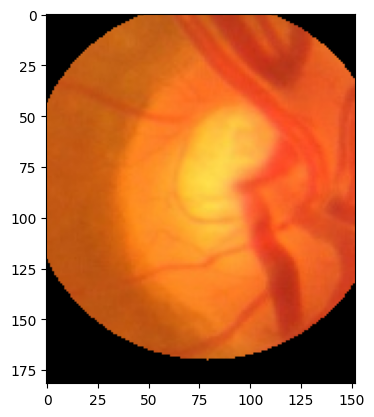

In [42]:
# Définir les coordonnées de la région d'intérêt en fonction des contours détectés
x, y, w, h = cv2.boundingRect(contours[0])
margin = 50
roi = img_roi[max(0, y-margin):min(y+h+margin, img_roi.shape[0]), max(0, x-margin):min(x+w+margin, img_roi.shape[1])]
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/papille.jpg',roi)
# Afficher l'image zoomée sur la papille optique
plt.imshow(roi)
plt.show()

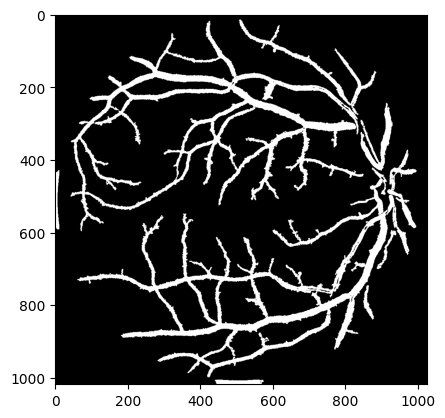

In [43]:
import cv2
import numpy as np
import os
import csv
import matplotlib.pyplot as plt


def extract_bv(image):
    b,green_fundus,r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced_green_fundus = clahe.apply(green_fundus)

    # applying alternate sequential filtering (3 times closing opening)
    r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
    f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
    f5 = clahe.apply(f4)

    # removing very small contours through area parameter noise removal
    ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
    mask = np.ones(f5.shape[:2], dtype="uint8") * 255
    contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) <= 200:
            cv2.drawContours(mask, [cnt], -1, 0, -1)
    im = cv2.bitwise_and(f5, f5, mask=mask)
    ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)
    newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)

    # removing blobs of unwanted bigger chunks taking in consideration they are not straight lines like blood
    #vessels and also in an interval of area
    fundus_eroded = cv2.bitwise_not(newfin)	
    xmask = np.ones(fundus.shape[:2], dtype="uint8") * 255
    xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)	
    for cnt in xcontours:
        shape = "unidentified"
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)  
        if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
            shape = "circle"	
        else:
            shape = "veins"
        if(shape=="circle"):
            cv2.drawContours(xmask, [cnt], -1, 0, -1)

    finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
    blood_vessels = cv2.bitwise_not(finimage)
    return blood_vessels

if __name__ == "__main__":
    fundus = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/try3.jpeg', cv2.IMREAD_COLOR)
    bloodvessel = extract_bv(fundus)
    cv2.imwrite("C:/Users/soltan/Desktop/project jupyter/DB/bloodvessel.jpg",bloodvessel)
#     # Afficher l'image en niveaux de gris
#     plt.imshow(fundus, cmap='gray')
#     plt.show()
    # Afficher l'image segmentée des vaisseaux sanguins
    plt.imshow(bloodvessel, cmap='binary')
    plt.show()


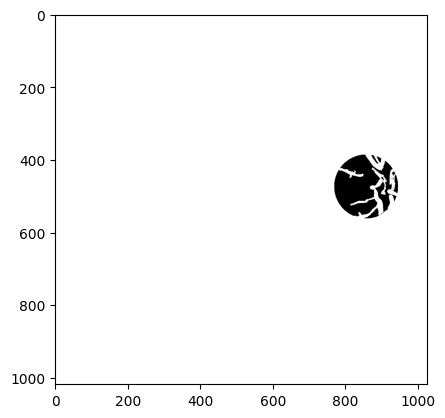

In [44]:
# Appliquer le masque sur l'image d'origine pour sélectionner la ROI
img_roi2 = cv2.bitwise_and(bloodvessel, bloodvessel, mask=mask)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/img_roi23.tiff',img_roi2)
plt.imshow(img_roi2,cmap='binary')
plt.show()

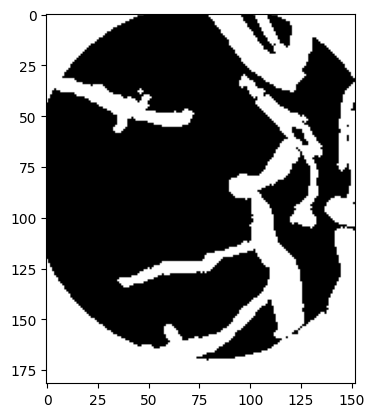

In [45]:
# Définir les coordonnées de la région d'intérêt en fonction des contours détectés
x, y, w, h = cv2.boundingRect(contours[0])
margin = 50
roi2 = img_roi2[max(0, y-margin):min(y+h+margin, img_roi2.shape[0]), max(0, x-margin):min(x+w+margin, img_roi2.shape[1])]
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/papille2.jpg',roi2)
# Afficher l'image zoomée sur la papille optique
plt.imshow(roi2,cmap='binary')
plt.show()

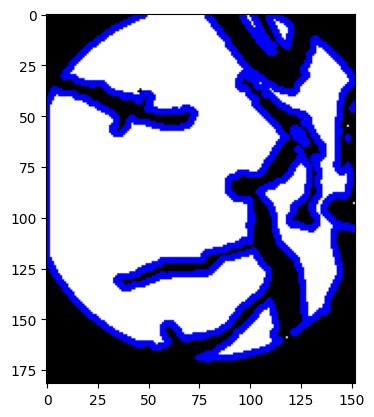

In [46]:
# Appliquer un seuillage pour segmenter les vaisseaux sanguins
ret, thresh = cv2.threshold(roi2, 127, 255, cv2.THRESH_BINARY)

# Trouver les contours des vaisseaux sanguins
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner des lignes droites le long des contours
img_contours = cv2.cvtColor(roi2, cv2.COLOR_GRAY2BGR)
for contour in contours:
    for i in range(len(contour)-1):
        cv2.line(img_contours, tuple(contour[i][0]), tuple(contour[i+1][0]), (0, 0, 255), thickness=2)

# Afficher l'image avec les lignes droites dessinées
# cv2.imshow("Lignes droites", img_contours)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img_contours,cmap="binary")
plt.show()


L'épaisseur moyenne des vaisseaux est de 28.965657373759374 pixels.


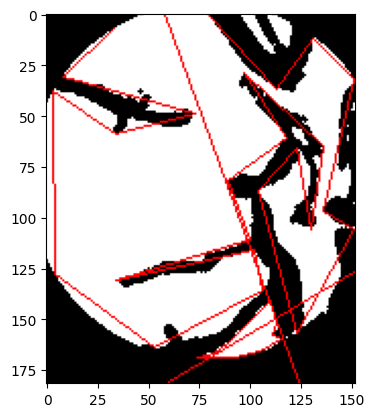

In [51]:
import math
# Appliquer un seuillage pour segmenter les vaisseaux sanguins
ret, thresh = cv2.threshold(roi2, 127, 255, cv2.THRESH_BINARY)

# Trouver les contours des vaisseaux sanguins 
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
thicknesses = []
# Pour chaque contour de vaisseau 
for contour in contours:
    # Calculer l'enveloppe convexe du contour
    hull = cv2.convexHull(contour)
    
    # Approximation polygonale du contour avec un seuil de tolérance 
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Ne garder que les contours profonds correspondant à des vaisseaux
    if 100 <= cv2.contourArea(contour) >200: 
        
        # Dessiner les lignes droites le long du contour approximé
        for i in range(len(approx)-1): 
            cv2.line(img_contours, approx[i][0], approx[i+1][0], (255, 0, 0), thickness=1)
            
        # Calculer l'épaisseur du vaisseau 
        x1, y1 = approx[0][0][0], approx[0][0][1]
        x2, y2 = approx[-1][0][0], approx[-1][0][1]
        thickness = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        thicknesses.append(thickness)
#         # Dessiner un cercle vert autour du vaisseau
#         (x,y),radius = cv2.minEnclosingCircle(contour)
#         center = (int(x),int(y))
#         radius = int(radius)
#         cv2.circle(img_contours,center,radius,(0,255,0),2)

# Afficher l'épaisseur moyenne des vaisseaux  
print(f"L'épaisseur moyenne des vaisseaux est de {np.mean(thicknesses)} pixels.")  
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/100.jpg',img_contours)
# Afficher l'image avec les lignes droites dessinées
plt.imshow(img_contours,cmap="binary")
plt.show()

In [25]:
print(f"Nombre de vaisseaux sanguins détectés : {len(contours)}")

Nombre de vaisseaux sanguins détectés : 10
